In [4]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import pandas as pd 
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import evolocity as evo
import scanpy as sc

# Annotate Fasta Files

In [3]:
sc2_spikes = 'Sequences/good_spikes_November2023.fa'
sarbeco_spikes = 'Sequences/mar21update_78vir_S_aa_sel_cn.fas'

fasta_sequences = SeqIO.parse(open(sc2_spikes),'fasta')
sequences = []
for fasta in fasta_sequences:
    sequences.append(fasta.id.split('|')+[str(fasta.seq)])
sequences = pd.DataFrame(sequences)
sequences.columns = ['ids','Accession.ID','Collection.date','Continent','Sequence']
sequences['Virus_Type'] = 'SC2'
sequences['Collection.date'] = pd.to_datetime(sequences['Collection.date'], infer_datetime_format=True)
sequences.Sequence = sequences.Sequence.str.replace('-','')
sequences['Sarbeco_Dataset'] = False
sequences

ids      Accession.ID Collection.date  \
0              hCoV-19/USA/AZ-TG668401/2020    EPI_ISL_696305      2020-05-13   
1               hCoV-19/USA/WI-UW-3271/2021   EPI_ISL_1039916      2021-02-01   
2           hCoV-19/Turkey/HSGM-B16828/2021   EPI_ISL_2984615      2021-06-16   
3       hCoV-19/Spain/MD-H12-LP23-5852/2020    EPI_ISL_428679      2020-03-08   
4        hCoV-19/India/RJ-CCMB-CIA6148/2020   EPI_ISL_3453802      2020-10-23   
...                                     ...               ...             ...   
2269            hCoV-19/Singapore/3600/2022  EPI_ISL_11870802      2022-04-02   
2270       hCoV-19/England/ALDP-672355/2020    EPI_ISL_558199      2020-07-03   
2271         hCoV-19/Belgium/ULG-10210/2020    EPI_ISL_484699      2020-06-05   
2272      hCoV-19/England/LSPA-3EAC05A/2022  EPI_ISL_13693022      2022-07-01   
2273  hCoV-19/USA/UT-UPHL-220407541041/2022  EPI_ISL_11900435      2022-03-25   

         Continent                                           Sequence  \
0     NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
1     NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2           Europe  MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
3           Europe  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
4             Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
...            ...                                                ...   
2269          Asia  MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...   
2270        Europe  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2271        Europe  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2272        Europe  MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...   
2273  NorthAmerica  MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...   

     Virus_Type  Sarbeco_Dataset  
0           SC2            False  
1           SC2            False  
2           SC2            False  
3           SC2            False  
4           SC2            False  
...         ...              ...  
2269        SC2            False  
2270        SC2            False  
2271        SC2            False  
2272        SC2            False  
2273        SC2            False  

[2274 rows x 7 columns]

In [4]:
sarbeco_fasta_sequences = SeqIO.parse(open(sarbeco_spikes),'fasta')
sarbeco_sequences = []
for fasta in sarbeco_fasta_sequences:
    sarbeco_sequences.append(fasta.id.split('|')+[str(fasta.seq)])
sarbeco_sequences = pd.DataFrame(sarbeco_sequences)
sarbeco_sequences.columns = ['Accession.ID','Virus_Type','Collection.date','Sequence']
sarbeco_sequences['Collection.date'] = pd.to_datetime(sarbeco_sequences['Collection.date'], infer_datetime_format=True)
sarbeco_sequences.Sequence = sarbeco_sequences.Sequence.str.replace('-','')
sarbeco_sequences['Sarbeco_Dataset'] = True
sarbeco_sequences

Accession.ID Virus_Type Collection.date  \
0         JX993987        SC1      2011-09-01   
1         KJ473814        SC1      2013-01-01   
2         DQ648857        SC1      2004-01-01   
3         DQ412043        SC1      2004-11-01   
4         KF294457        SC1      2012-01-01   
..             ...        ...             ...   
60  EPI_ISL_410540        SC2      2017-01-01   
61  EPI_ISL_410541        SC2      2017-01-01   
62  EPI_ISL_410539        SC2      2017-01-01   
63  EPI_ISL_410542        SC2      2017-01-01   
64      LC556375.1        SC2      2013-01-01   

                                             Sequence  Sarbeco_Dataset  
0   MILLLLFLSSAKAQEGCGVISNKPQRTFDQYSSTFRGVYYNDDIFR...             True  
1   MILLLLFLSSAAAQEGCGVISNKPQRTFDQYSSTRRGVYYNDDIFR...             True  
2   MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...             True  
3   MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...             True  
4   MKILILAFLANLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...             True  
..                                                ...              ...  
60  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...             True  
61  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...             True  
62  MFVFLFVLPLVSSQCVNLTTRTGIQPGYTNSSTRGVYYPDKVFRSS...             True  
63  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...             True  
64  MFILVLLNVLSVYGCVNITYGSHHLYVSSRTRGVYYPDDAFRSSTN...             True  

[65 rows x 5 columns]

In [5]:
all_sequences = pd.concat([sequences,sarbeco_sequences],axis=0)
all_sequences

ids     Accession.ID Collection.date  \
0          hCoV-19/USA/AZ-TG668401/2020   EPI_ISL_696305      2020-05-13   
1           hCoV-19/USA/WI-UW-3271/2021  EPI_ISL_1039916      2021-02-01   
2       hCoV-19/Turkey/HSGM-B16828/2021  EPI_ISL_2984615      2021-06-16   
3   hCoV-19/Spain/MD-H12-LP23-5852/2020   EPI_ISL_428679      2020-03-08   
4    hCoV-19/India/RJ-CCMB-CIA6148/2020  EPI_ISL_3453802      2020-10-23   
..                                  ...              ...             ...   
60                                  NaN   EPI_ISL_410540      2017-01-01   
61                                  NaN   EPI_ISL_410541      2017-01-01   
62                                  NaN   EPI_ISL_410539      2017-01-01   
63                                  NaN   EPI_ISL_410542      2017-01-01   
64                                  NaN       LC556375.1      2013-01-01   

       Continent                                           Sequence  \
0   NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
1   NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2         Europe  MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
3         Europe  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
4           Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
..           ...                                                ...   
60           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
61           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
62           NaN  MFVFLFVLPLVSSQCVNLTTRTGIQPGYTNSSTRGVYYPDKVFRSS...   
63           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
64           NaN  MFILVLLNVLSVYGCVNITYGSHHLYVSSRTRGVYYPDDAFRSSTN...   

   Virus_Type  Sarbeco_Dataset  
0         SC2            False  
1         SC2            False  
2         SC2            False  
3         SC2            False  
4         SC2            False  
..        ...              ...  
60        SC2             True  
61        SC2             True  
62        SC2             True  
63        SC2             True  
64        SC2             True  

[2339 rows x 7 columns]

In [6]:
metadata = pd.read_csv('Metadata/good_spikes_November2023.tsv',sep='\t')[['Accession.ID','VOC','Pango.lineage','n']]
metadata

Accession.ID          VOC Pango.lineage     n
0       EPI_ISL_529213      Non-VOC             A  3254
1       EPI_ISL_413456      Non-VOC           A.1  3950
2       EPI_ISL_420078      Non-VOC          A.11    22
3       EPI_ISL_777275      Non-VOC          A.12     6
4       EPI_ISL_622563      Non-VOC          A.15    63
...                ...          ...           ...   ...
2269  EPI_ISL_11725807  Recombinant            XW   195
2270  EPI_ISL_11953320  Recombinant            XY   126
2271  EPI_ISL_11757732  Recombinant            XZ   220
2272    EPI_ISL_651724      Non-VOC           Y.1    77
2273    EPI_ISL_587449      Non-VOC           Z.1   271

[2274 rows x 4 columns]

In [7]:
with_meta = pd.merge(all_sequences,metadata,left_on='Accession.ID',right_on='Accession.ID',how='left')
with_meta.VOC = with_meta.VOC.fillna('Sarbeco')
with_meta

ids     Accession.ID Collection.date  \
0            hCoV-19/USA/AZ-TG668401/2020   EPI_ISL_696305      2020-05-13   
1             hCoV-19/USA/WI-UW-3271/2021  EPI_ISL_1039916      2021-02-01   
2         hCoV-19/Turkey/HSGM-B16828/2021  EPI_ISL_2984615      2021-06-16   
3     hCoV-19/Spain/MD-H12-LP23-5852/2020   EPI_ISL_428679      2020-03-08   
4      hCoV-19/India/RJ-CCMB-CIA6148/2020  EPI_ISL_3453802      2020-10-23   
...                                   ...              ...             ...   
2334                                  NaN   EPI_ISL_410540      2017-01-01   
2335                                  NaN   EPI_ISL_410541      2017-01-01   
2336                                  NaN   EPI_ISL_410539      2017-01-01   
2337                                  NaN   EPI_ISL_410542      2017-01-01   
2338                                  NaN       LC556375.1      2013-01-01   

         Continent                                           Sequence  \
0     NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
1     NorthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2           Europe  MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
3           Europe  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
4             Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
...            ...                                                ...   
2334           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
2335           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
2336           NaN  MFVFLFVLPLVSSQCVNLTTRTGIQPGYTNSSTRGVYYPDKVFRSS...   
2337           NaN  MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...   
2338           NaN  MFILVLLNVLSVYGCVNITYGSHHLYVSSRTRGVYYPDDAFRSSTN...   

     Virus_Type  Sarbeco_Dataset      VOC Pango.lineage       n  
0           SC2            False  Non-VOC       B.1.240  7441.0  
1           SC2            False  Non-VOC       B.1.623  1908.0  
2           SC2            False    Delta        AY.109  4137.0  
3           SC2            False  Non-VOC       B.1.157   209.0  
4           SC2            False  Non-VOC       B.1.560  1624.0  
...         ...              ...      ...           ...     ...  
2334        SC2             True  Sarbeco           NaN     NaN  
2335        SC2             True  Sarbeco           NaN     NaN  
2336        SC2             True  Sarbeco           NaN     NaN  
2337        SC2             True  Sarbeco           NaN     NaN  
2338        SC2             True  Sarbeco           NaN     NaN  

[2339 rows x 10 columns]

In [8]:
with_meta = with_meta.sort_values('Collection.date')
with_meta.head(70)

ids     Accession.ID Collection.date  \
2317                                NaN         AY394995      2002-12-01   
2276                                NaN         DQ648857      2004-01-01   
2277                                NaN         DQ412043      2004-11-01   
2329                                NaN         DQ412042      2004-11-01   
2293                                NaN         DQ071615      2004-12-01   
...                                 ...              ...             ...   
2195   hCoV-19/Wuhan/IPBCAMS-WH-01/2019   EPI_ISL_402123      2019-12-24   
1147        hCoV-19/Wuhan/IME-WH01/2019   EPI_ISL_529213      2019-12-30   
211   hCoV-19/Argentina/PAIS-A1026/2020  EPI_ISL_4405694      2020-01-01   
671     hCoV-19/Japan/20200409-129/2020  EPI_ISL_2671842      2020-01-09   
2050      hCoV-19/Lebanon/LAU-R107/2020  EPI_ISL_8311702      2020-01-10   

         Continent                                           Sequence  \
2317           NaN  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
2276           NaN  MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...   
2277           NaN  MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...   
2329           NaN  MKILIFAFLVTLVKAQEGCGVINLRTQPKLTQVSSSRRGVYYNDDI...   
2293           NaN  MKILILAFLASLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDI...   
...            ...                                                ...   
2195          Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
1147          Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
211   SouthAmerica  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
671           Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   
2050          Asia  MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...   

     Virus_Type  Sarbeco_Dataset      VOC Pango.lineage         n  
2317        SC1             True  Sarbeco           NaN       NaN  
2276        SC1             True  Sarbeco           NaN       NaN  
2277        SC1             True  Sarbeco           NaN       NaN  
2329        SC1             True  Sarbeco           NaN       NaN  
2293        SC1             True  Sarbeco           NaN       NaN  
...         ...              ...      ...           ...       ...  
2195        SC2            False  Non-VOC             B   13187.0  
1147        SC2            False  Non-VOC             A    3254.0  
211         SC2            False  Non-VOC       B.1.499    1054.0  
671         SC2            False  Non-VOC     B.1.1.285     158.0  
2050        SC2            False  Non-VOC           B.1  137036.0  

[70 rows x 10 columns]

In [9]:
with_meta.ids = with_meta.ids.str.replace('nan','Sarbeco')
with_meta.ids = with_meta.ids.fillna('Sarbeco')
with_meta['Pango.lineage'] = with_meta['Pango.lineage'].fillna('Sarbeco')
with_meta.n = with_meta.n.fillna(0)

In [12]:
duplicate_sequences = set([])
final_sequences = []
with open("Sequences/Annotated_All_Spikes.fasta","w") as out_file:
    for i,row in with_meta.iterrows():
        annotated_name = "Accession="+str(row['Accession.ID'])
        annotated_name +="|id="+str(row['Pango.lineage'])
#         annotated_name +="|VOC="+str(row['VOC'])
#         annotated_name+="|Date="+str(row['Collection.date'])[:10]
#         annotated_name+="|Type="+str(row['Virus_Type'])
#         annotated_name+="|Count="+str(int(row['n']))
        if str(row.Sequence) in duplicate_sequences:
#             print(f"Duplicate sequence for lineage {str(row['Accession.ID'])}")
            continue
        else:
            duplicate_sequences.add(str(row.Sequence))
        final_sequences.append(SeqRecord(Seq(str(row.Sequence).replace("*","").replace("-","")),id=annotated_name, description=""))
    SeqIO.write(final_sequences, out_file, "fasta")
        

# Compile FASTA Files into one

In [14]:
# Load sequences and compute language model embeddings.
fasta_fname = 'Sequences/Annotated_All_Spikes.fasta'
adata = evo.pp.featurize_fasta(fasta_fname,model_name="esm2-small",fasta_metadata_record=True,embed_batch_size=100)

# Construct sequence similarity network.
evo.pp.neighbors(adata)

# # Run evolocity analysis.
evo.tl.velocity_graph(adata,model_name="esm2-small")

# Annotate Sequences

In [27]:
adata.obs = pd.merge(adata.obs,with_meta,left_on='Accession',right_on='Accession.ID',how='left')

In [28]:
adata.obs.index = adata.obs.index.astype(str)

In [29]:
adata.obs['Numeric_Date'] = adata.obs['Collection.date'].astype(str).str.replace('-','').astype(int)

In [161]:
colourmap = {'Non-VOC':'#9667BC','Alpha':'#1877B5','Beta':'#FF7F09','Gamma':'#D52627','Delta':'#369D33','Omicron':'#8C5D54','Recombinant':'#FC6C85','Descendant':'Grey'}

In [11]:
# adata.uns['VOC_colors']  =  [colourmap[v]  for v in adata.obs.VOC.cat.categories]

In [162]:
adata.uns['voc_origins_colors']  =  [colourmap[v]  for v in adata.obs.voc_origins.cat.categories]

In [152]:
voc_origins = {'B.1.1.7','B.1.351','P.1','B.1.617.2','B.1.1.529'}

In [153]:
adata.obs['voc_origins'] = [adata.obs.VOC[i] if v in voc_origins else 'Descendant' for i,v in enumerate(adata.obs.id)]

# Plot Evovelocity

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


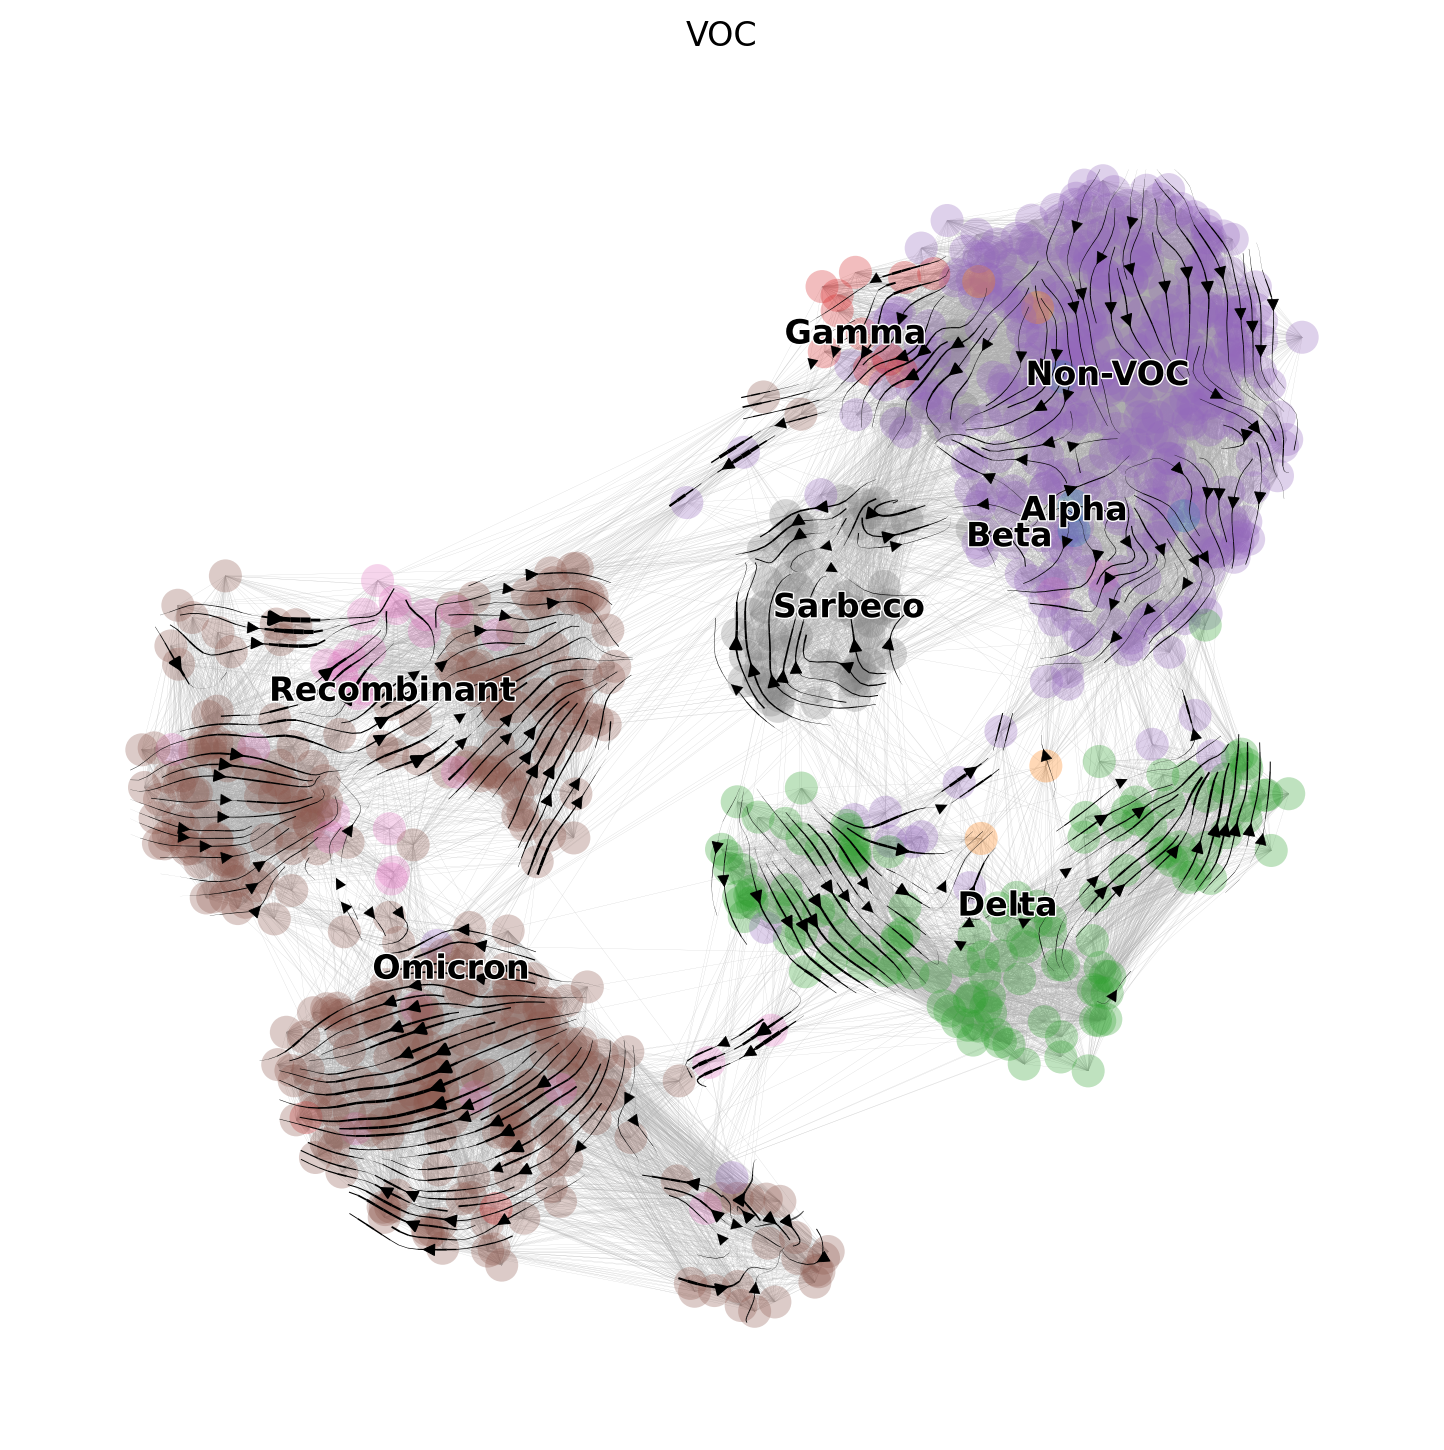

In [173]:
fig,ax = plt.subplots(figsize=[9,9])
sc.tl.umap(adata,min_dist=1.07,spread=0.4033,)
evo.tl.velocity_embedding(adata, basis='umap', scale=1.)
evo.pl.velocity_embedding_stream(adata, basis='umap',  min_mass=0.32, smooth=0.32, density=2.,
    color='VOC', show=False,ax=ax
)
sc.pl._utils.plot_edges(ax, adata, 'umap', 0.05, '#aaaaaa')
plt.plot()
plt.savefig('UMAP_VOC.png')

In [ ]:
plt.savefig('VOC_UMAP.svg')
# plt.savefig("test.svg", format="svg")

computing terminal states
    identified 4 regions of root nodes and 2 regions of end points .
    finished (0:00:00) --> added
    'root_nodes', root nodes of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


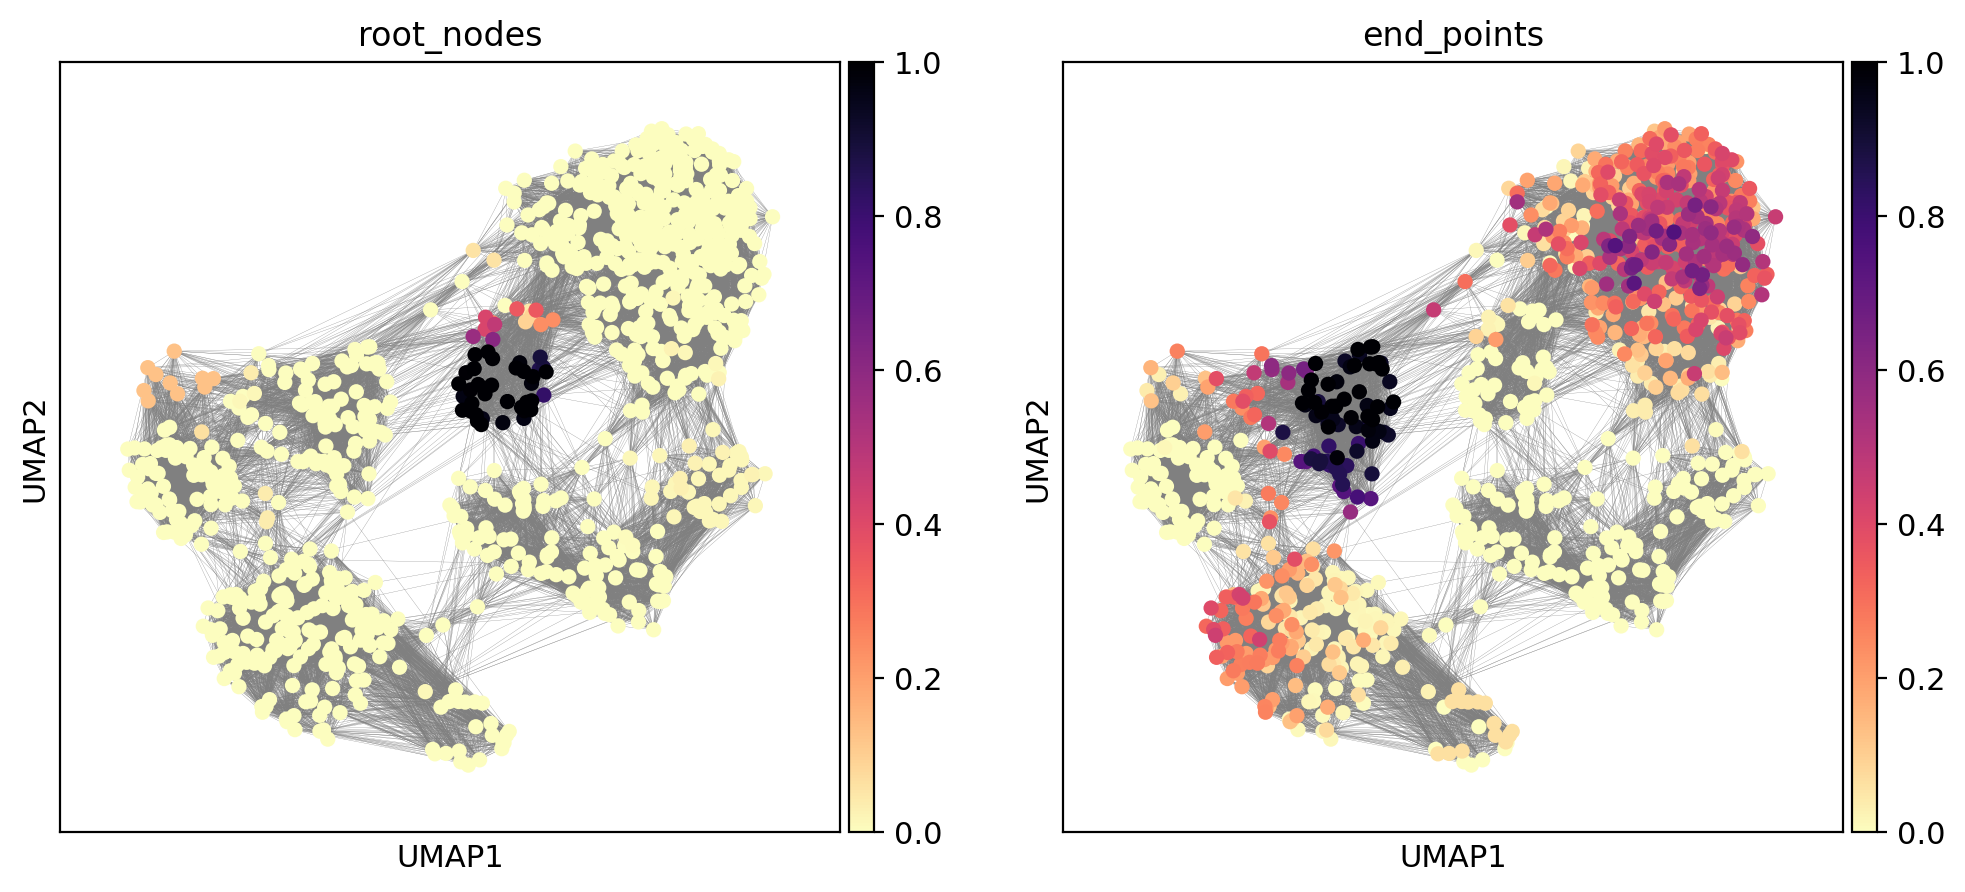

In [175]:
import matplotlib.pyplot as plt
evo.tl.terminal_states(adata)
sc.pl.umap(
    adata, color=[ 'root_nodes', 'end_points' ],
    color_map=plt.cm.get_cmap('magma').reversed(),
    edges=True,
)

In [70]:
evo.tl.velocity_pseudotime(adata)

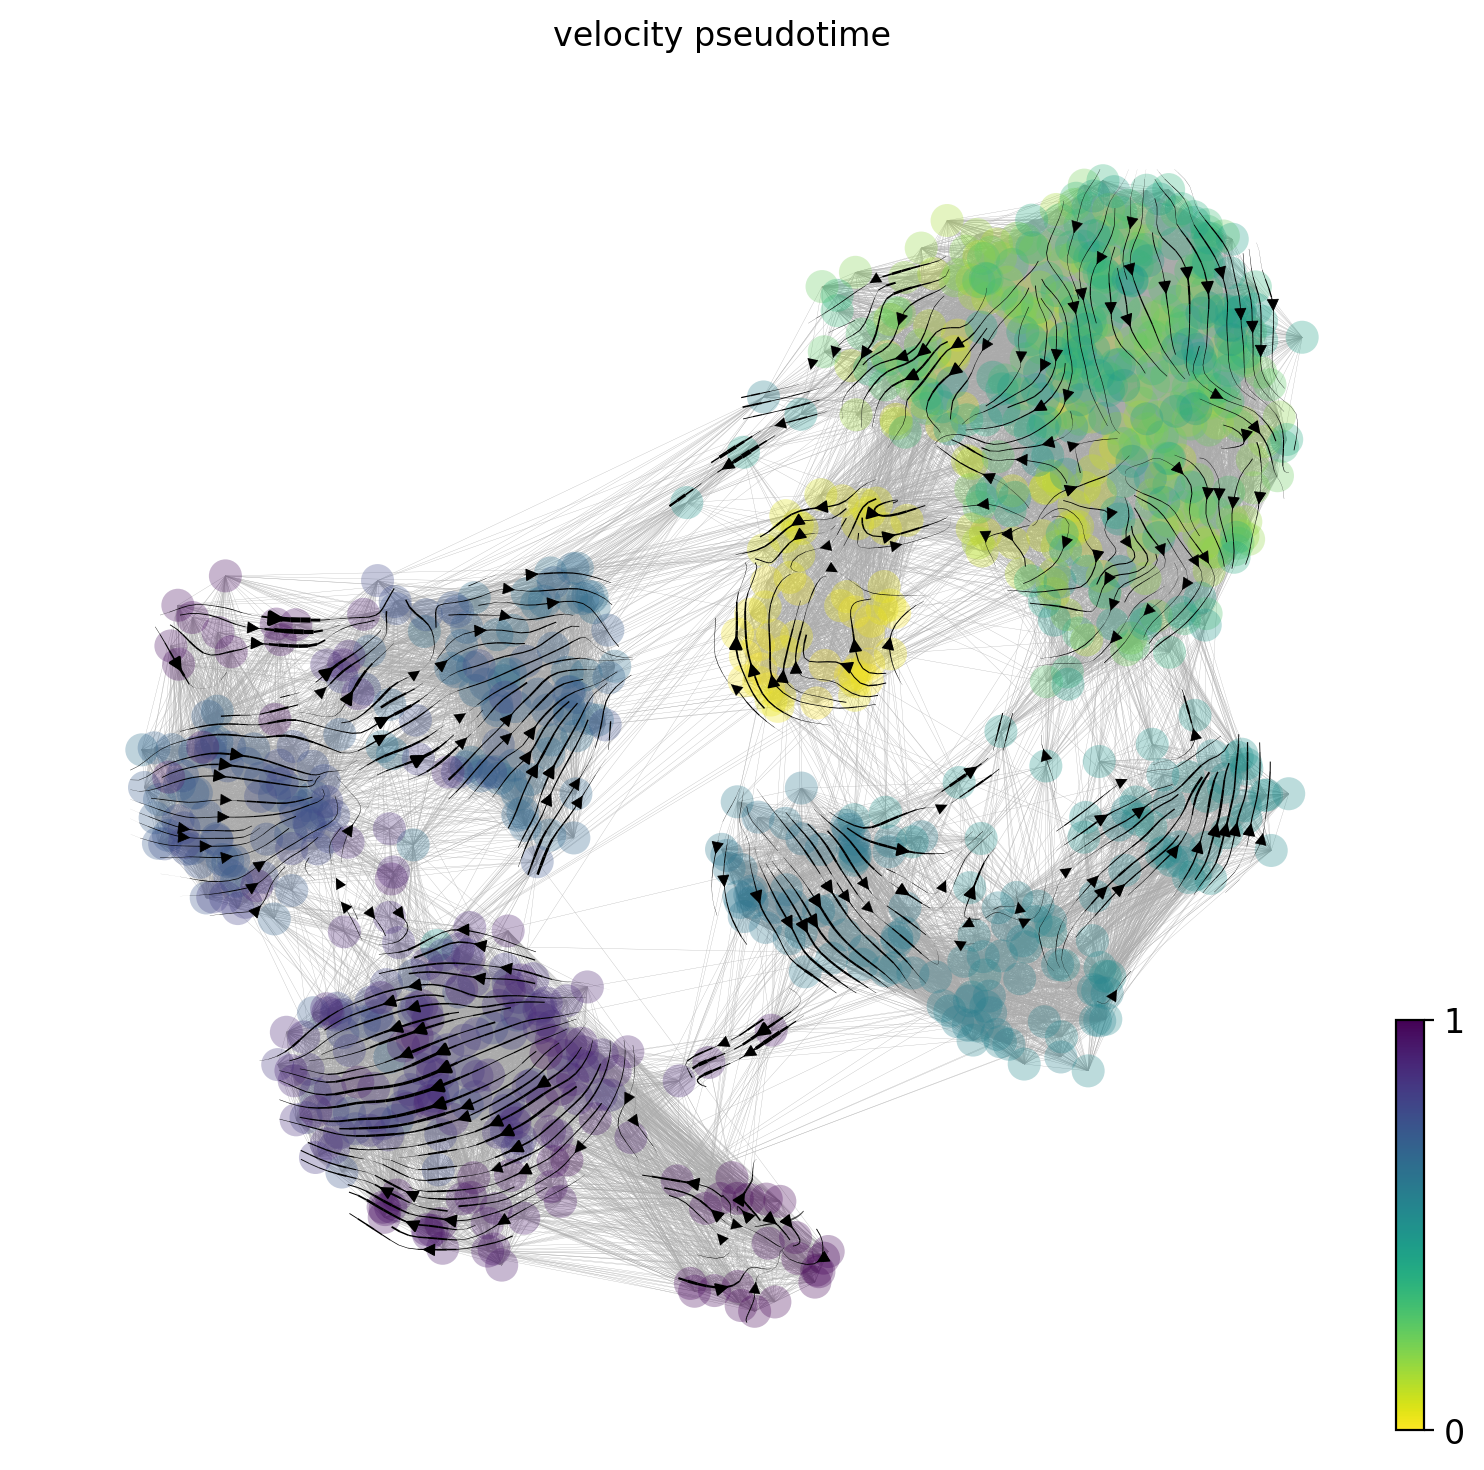

In [172]:
fig,ax = plt.subplots(figsize=[9,9])
# sc.tl.umap(adata,min_dist=1,spread=0.39,)
# evo.tl.velocity_embedding(adata, basis='umap', scale=1.)
evo.pl.velocity_embedding_stream(adata, basis='umap',  min_mass=0.32, smooth=0.32, density=2.,
    color='velocity_pseudotime', show=False,ax=ax
)
sc.pl._utils.plot_edges(ax, adata, 'umap', 0.1, '#aaaaaa')
plt.plot()
plt.savefig('Evolocity_UMAP_VOC.png')

In [73]:
import scipy.stats as ss
import numpy as np
# nnan_idx = (np.isfinite(adata.obs['Numeric_Date']) &
#             np.isfinite(adata.obs['velocity_pseudotime']))
# print(nnan_idx.all())
# adata_nnan = adata[nnan_idx]

print('Pseudotime-time Spearman r = {}, P = {}'
      .format(*ss.spearmanr(adata.obs['velocity_pseudotime'],
                            adata.obs['Numeric_Date'],
                            nan_policy='omit')))

Pseudotime-time Spearman r = 0.8640833191655491, P = 3.243847927787139e-296
